In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time, datetime

import lkmodels as lkm
import lkhelpers as lkh

### Funciones

In [2]:
# modelos para probar
models = {
# distance models
#    'centroide' : lambda s,p: lkm.scores_centroide(s,p,robust=False)
#    ,'centroide_robust': lambda s,p: lkm.scores_centroide(s,p,robust=True)
#    ,'distancias': lambda s,p: lkm.scores_distancias(s,p,robust=False)
#    ,'distancias_robust': lambda s,p: lkm.scores_distancias(s,p,robust=True)
# class models
#    ,'logistic': lambda s,p: lkm.scores_clf(s,p,random_state=rng, clf='logistic', penalty='l2')
#    ,'tree': lambda s,p: lkm.scores_clf(s,p,random_state=rng, clf='tree', min_samples_leaf=1)
#    ,'rf': lambda s,p: lkm.scores_clf(s,p,random_state=rng, clf='rf', min_samples_leaf=10,
#                                     n_estimators=10, max_features='sqrt')
# bagged models        
    'bagged50_logistic': lambda s,p: lkm.scores_bagged_clf(s,p,random_state=rng, clf='logistic' 
                                                           ,T=50,penalty='none')
    ,'sbagged50_logistic': lambda s,p: lkm.scores_smartbagged_clf(s,p,random_state=rng, clf='logistic' 
                                                           ,T=50, l1=0.5, l2=0.5, e1=0.5, e2=0.7, penalty='none')

    ,'bagged50_tree': lambda s,p: lkm.scores_bagged_clf(s,p,random_state=rng, clf='tree' 
                                                           ,T=50, min_samples_leaf=10)
    ,'sbagged50_tree': lambda s,p: lkm.scores_smartbagged_clf(s,p,random_state=rng, clf='tree' 
                                                           ,T=50, l1=0.5, l2=0.5, e1=0.5, e2=0.7, min_samples_leaf=10)

    ,'bagged50_tree_flex': lambda s,p: lkm.scores_bagged_clf(s,p,random_state=rng, clf='tree' 
                                                           ,T=50, min_samples_leaf=2)
    ,'sbagged50_tree_flex': lambda s,p: lkm.scores_smartbagged_clf(s,p,random_state=rng, clf='tree' 
                                                           ,T=50, l1=0.5, l2=0.5, e1=0.7, min_samples_leaf=2)
}

In [3]:
# resultados de cada modelo en un dataset dado
def lk_report(X, y, idx_hidden, models_dict):
    X_seed = X[y == 1,:]
    X_poblacion = X[y == 0,:]
    metrics = dict()
    times = dict()
    for k,f in models.items():
        t0 = time.time()
        scores = f(X_seed, X_poblacion)
        metrics[k] = lkh.avg_precision(y, idx_hidden, scores) * 100
        times[k] = (time.time() - t0) / 60
    df = pd.DataFrame({'precision': metrics, 'time': times})
    return df

### Simulación

In [4]:
rng = np.random.RandomState(999)
datasets = dict()

datasets['baseline'] = lkh.make_dataset(rng, n_samples=10000, n_features=20, weights=[0.70, 0.30]
                                       ,n_informative=15, n_redundant=5, n_repeated=0)
datasets['low_dim'] = lkh.make_dataset(rng, n_samples=10000, n_features=5, weights=[0.70, 0.30]
                                       ,n_informative=5, n_redundant=0, n_repeated=0)
datasets['high_dim'] = lkh.make_dataset(rng, n_samples=10000, n_features=100, weights=[0.70, 0.30]
                                       ,n_informative=50, n_redundant=50, n_repeated=0, flip_y=0.5)
datasets['contaminated'] = lkh.make_dataset(rng, n_samples=10000, n_features=20, weights=[0.70, 0.30]
                                       ,n_informative=15, n_redundant=5, n_repeated=0, flip_y=0.5)
datasets['no_sep'] = lkh.make_dataset(rng, n_samples=10000, n_features=20, weights=[0.70, 0.30]
                                       ,n_informative=15, n_redundant=5, n_repeated=0, class_sep=0.5)
datasets['clusters'] = lkh.make_dataset(rng, n_samples=10000, n_features=20, weights=[0.70, 0.30]
                                       ,n_informative=15, n_redundant=5, n_repeated=0, n_clusters_per_class=3)

In [5]:
rdos = dict()
for k,v in datasets.items():
    rdos[k] = lk_report(v[0], v[1], v[2], models)
    print(f'{datetime.datetime.now()}: {k} DONE ---')

2023-03-26 19:51:14.733916: baseline DONE ---
2023-03-26 19:51:20.404666: low_dim DONE ---


C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

2023-03-26 19:52:49.338025: high_dim DONE ---
2023-03-26 19:53:16.199561: contaminated DONE ---
2023-03-26 19:53:30.557394: no_sep DONE ---
2023-03-26 19:53:47.486774: clusters DONE ---


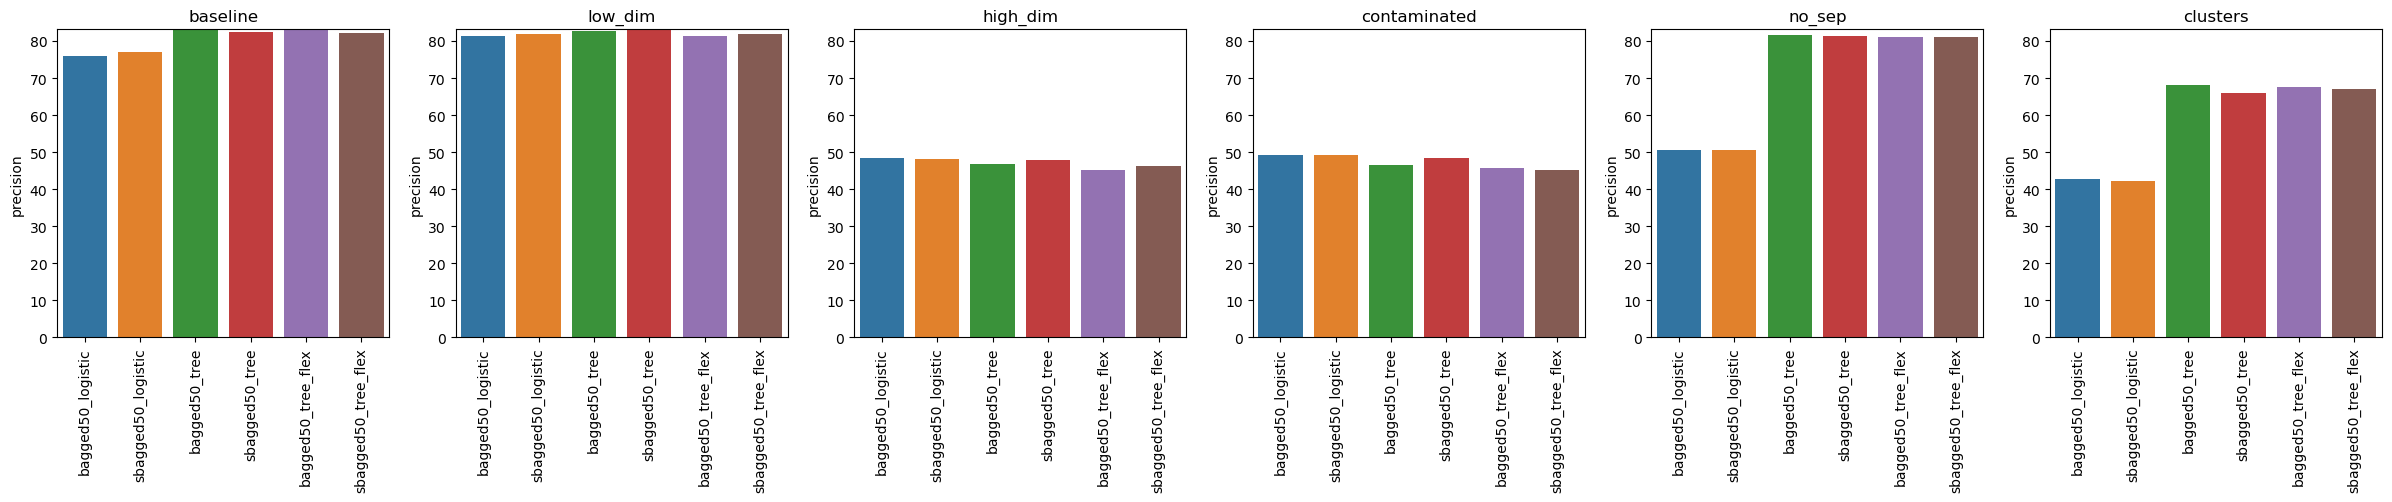

In [6]:
# plot metrics
f, axs = plt.subplots(figsize=(30,4), nrows=1, ncols=len(rdos.keys()))
max_precision = pd.concat(rdos)['precision'].max()
i = 0
for name, df in rdos.items():
    sns.barplot(x=df.index, y=df['precision'], ax=axs[i])
    axs[i].set_title(name)
    axs[i].set_ylim(0, max_precision)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    i += 1

In [15]:
# result example
# rdos['baseline']
# rdos['low_dim']
# rdos['high_dim']
# rdos['contaminated']
# rdos['no_sep']
rdos['clusters']

,precision,time
bagged50_logistic,42.654254,0.010307
sbagged50_logistic,42.274914,0.011261
bagged50_tree,68.015180,0.039495
sbagged50_tree,66.054690,0.044200
bagged50_tree_flex,67.484444,0.059266
sbagged50_tree_flex,67.170754,0.117618


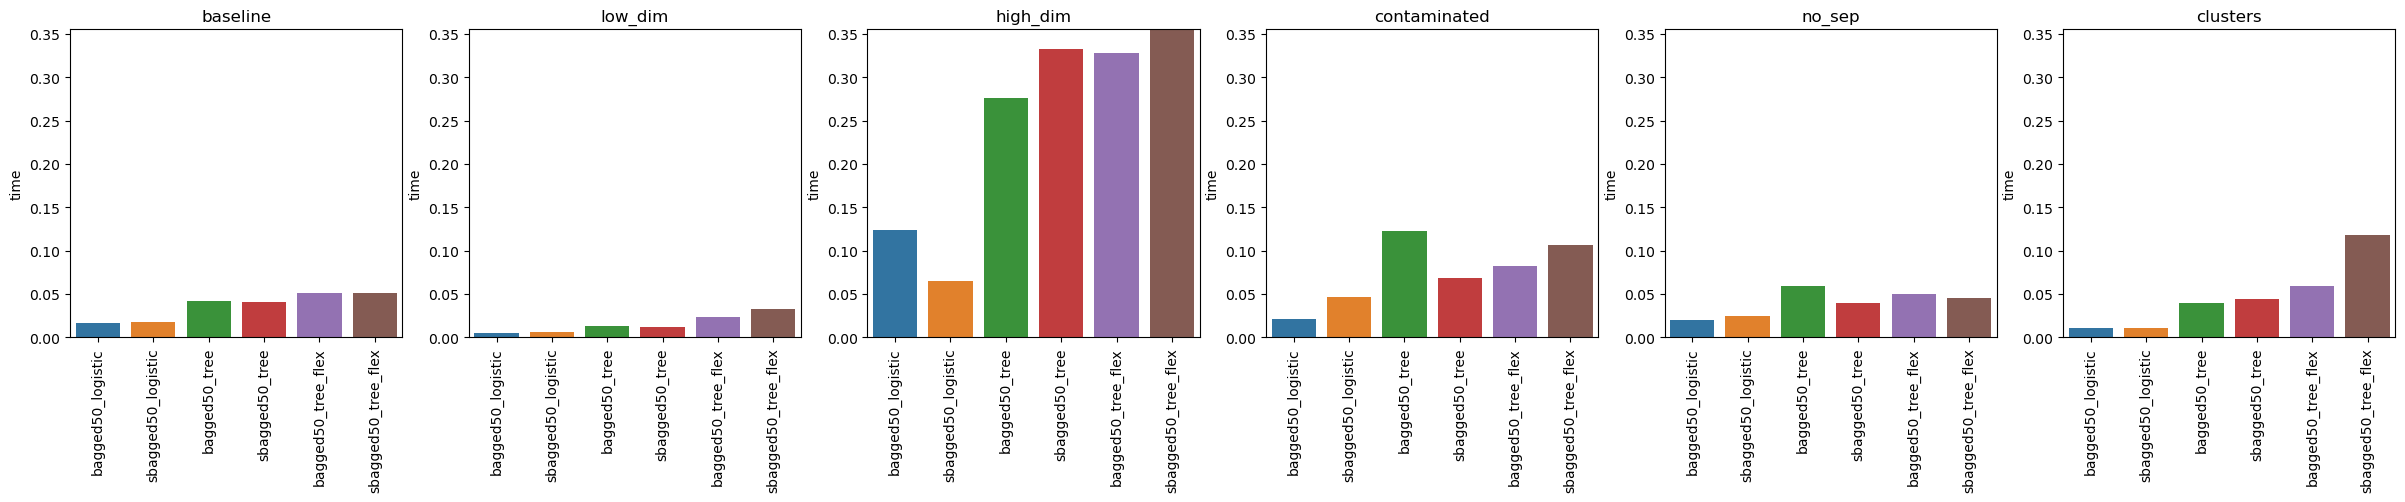

In [8]:
# plot time
# plot metrics
f, axs = plt.subplots(figsize=(30,4), nrows=1, ncols=len(rdos.keys()))
max_precision = pd.concat(rdos)['time'].max()
i = 0
for name, df in rdos.items():
    sns.barplot(x=df.index, y=df['time'], ax=axs[i])
    axs[i].set_title(name)
    axs[i].set_ylim(0, max_precision)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    i += 1